# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

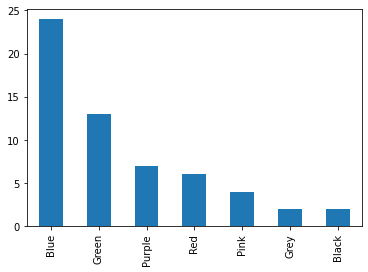

In [ ]:
import pandas as pd

sheet_url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
url_1 = sheet_url.replace("/edit#gid=", "/export?format=csv&gid=")
df_responses = pd.read_csv(url_1)

color_counts = df_responses["What is your favorite color?"].value_counts()
color_counts

#cleaning data -> moved certain colors into more umbrella colors (ex. teal -> blue)

def clean_data(c):
  if c.__contains__("blue") | c.__contains__("Blue") | c.__contains__("Navy"):
    return "Blue"
  if c.__contains__("green") | c.__contains__("Green") | c.__contains__("turquoise") | c.__contains__("Teal"):
    return "Green"
  if c.__contains__("Pink") | c.__contains__("pink"):
    return "Pink"
  if c.__contains__("Purple") | c.__contains__("purple") | c.__contains__("Magenta"):
    return "Purple"
  if c.__contains__("Black") | c.__contains__("black"):
    return "Black"
  if c.__contains__("Red") | c.__contains__("red"):
    return "Red"
  if c.__contains__("Gray") | c.__contains__("grey"):
    return "Grey"
  
  return c

df_responses["What is your favorite color?"] = df_responses['What is your favorite color?'].map(clean_data)

color_counts = df_responses["What is your favorite color?"].value_counts()
color_counts.plot.bar()


Blue is the most popular favorite color. The more neutral/dark colors of grey and black are the least popular among the sample data set given.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

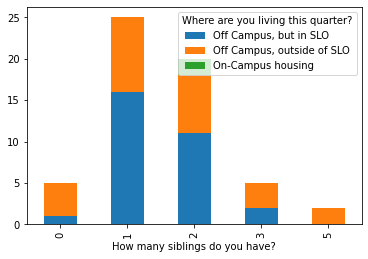

In [ ]:
ct_sibling_housing = pd.crosstab(df_responses["How many siblings do you have?"], df_responses["Where are you living this quarter?"])
ct_sibling_housing.plot.bar(stacked = True)

For the most part single children predominantly live outside of SLO, with just over 60 percent of 301 students with one sibling live off campus but in SLO, while this ratio dropping to more around 50% when students have 2 siblings. The trend I am seeing from this data is that the more siblings a student has, the more likely that they live outside of SLO, while also it seems that only-child students also are very likely to reside outside of SLO.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

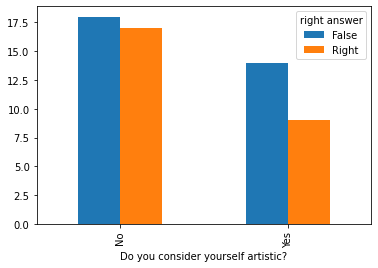

In [ ]:
ct_golf_art = pd.crosstab(df_responses["right answer"], df_responses["Do you consider yourself artistic?"])

def right_answer(c):
  diff = c - 1180000
  if abs(c) < 200000:
    return "Right"
  return "False"

df_responses["right answer"] = df_responses["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"].map(right_answer)
df_responses["right answer"].value_counts()

ct_golf_art.T.plot.bar()

# I chose to count a correct answer to be within .2 million of the "correct" one taken from Quorra


I find an interesting relationship between "artistic" students and whether or not they were relatively near to the correct answer supplied from Quorra. There is a higher ratio of student who got the answer "correct" who were not artistic versus those who were.



## Question 4

Write and answer your own question using this data set.

Question: Is there any relationship between whether a student considers themselves as a sport fan and if they consider themselves as artistic? Please create a visualization of the relationship between the two student attributes.

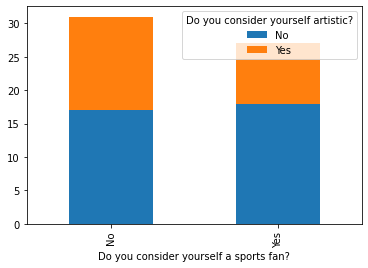

In [ ]:
ct_sports_art = pd.crosstab(df_responses["Do you consider yourself a sports fan?"], df_responses["Do you consider yourself artistic?"])
ct_sports_art.plot.bar(stacked = True)

It seems that a slight majority of the class did not identify as a sport fan, while it also seems that a slight majority also didn't identify as artistic as well. Between the two variables, it seems that a there is slightly greater chance that you do not consider yourself as artistic if you elected to claim that you were a sports fan.